In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
from lib import DihedralAdherence
from lib import PDBMineQuery
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from pathlib import Path
PDBMINE_URL = os.getenv("PDBMINE_URL")
PROJECT_DIR = 'casp_da'

Initializing T1029-D1 ...
Results already exist
Casp ID: T1029-D1 	PDB: 6uf2
Structure exists: 'pdb/pdb6uf2.ent' 
No CASP AlphaFold prediction
Highest DA Differences:

|   pos |   pos_xray | seq_ctxt   |   da_pred |   da_xray |   da_diff |
|------:|-----------:|:-----------|----------:|----------:|----------:|
|    76 |         76 | LQFNNDA    |  198.652  |   4.37829 |  194.274  |
|    48 |         48 | RAVEGGA    |  157.934  |  15.9561  |  141.978  |
|    49 |         49 | AVEGGAP    |  152.137  |  20.3623  |  131.775  |
|   106 |        106 | YQRMQKT    |  152.209  |  20.9154  |  131.294  |
|    50 |         50 | VEGGAPI    |  192.305  |  65.2647  |  127.04   |
|   107 |        107 | QRMQKTD    |  146.081  |  20.1406  |  125.941  |
|     8 |          8 | LVPADPR    |  161.89   |  46.2556  |  115.634  |
|     9 |          9 | VPADPRA    |  135.967  |  32.0189  |  103.948  |
|    23 |         23 | YSQANRR    |  178.026  |  87.9126  |   90.1136 |
|    16 |         16 | VSLYTPY    |   84

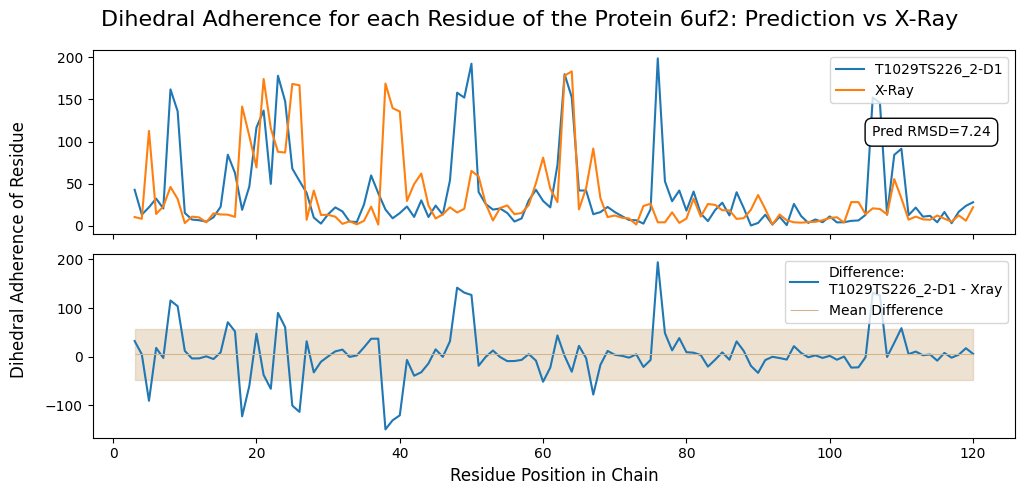

target            0 MRIDELVPADPRAVSLYTPYYSQANRRRYLPYALSLYQGSSIEGSRAVEGGAPISFVATW
                  0 ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
query             0 MRIDELVPADPRAVSLYTPYYSQANRRRYLPYALSLYQGSSIEGSRAVEGGAPISFVATW

target           60 TVTPLPADMTRCHLQF 76
                 60 |||||||||||||||| 76
query            60 TVTPLPADMTRCHLQF 76


RMSD(0-76)=6.045

target            0 NDAELTYEILLPNHEFLEYLIDMLMGYQRMQKTDFPGAFYRRLLGYDS 48
                  0 |||||||||||||||||||||||||||||||||||||||||||||||| 48
query             0 NDAELTYEILLPNHEFLEYLIDMLMGYQRMQKTDFPGAFYRRLLGYDS 48


RMSD(77-end)=3.512


Total RMSD = 6.045+3.512 = 9.557
Original RMSD=7.314
Computed Total RMSD: 5.212605234179973
Mean RMSD: 4.778


In [36]:
PDBMINE_URL = os.getenv("GREEN_PDBMINE_URL")
PROJECT_DIR = 'casp_da'
proteins = ['T1024', 'T1096', 'T1091', 'T1030', 'T1038', 'T1030-D2', 'T1024-D1', 'T1032-D1', 'T1053-D1', 'T1027-D1', 'T1029-D1']
da = DihedralAdherence(proteins[10], [4,5,6,7], PDBMINE_URL, PROJECT_DIR, kdews=[1,32,64,128], 
                       mode='ml', weights_file='ml_data/best_model_kde_64-64_390.pt', device='cuda')
                    #    mode='weighted_kde_af')
# da.test_pdbmine_conn()
# da.compute_structures(replace=False)
# da.query_pdbmine()

da.load_results_da()
da.filter_nas(quantile=0.8)
# rsquared, pearsonr = da.test_correlation()
# da.filter_nas(quantile=0.7)
# results = pd.concat([q.results for q in da.queries])
# print(results.groupby('phi').size().sort_index(ascending=False).head())
# results.describe().loc[['min','max'], ['phi','psi']]
# print(da.xray_phi_psi.describe().loc[['min','max'], ['phi','psi']])
# da.phi_psi_predictions.describe().loc[['min','max'], ['phi','psi']]
# da.plot_da_for_seq()
# da.plot_dist_kde(percentile=0.50)
# both = da.plot_res_vs_da()
# da.plot_da_vs_gdt()
# da.plot_da_vs_gdt_simple()
# print(da.grouped_preds.da_na.describe())
# print(da.grouped_preds[da.grouped_preds.da_na > da.grouped_preds.da_na.quantile(0.9)].shape)
da.plot_res_vs_da(da.protein_ids[0])
# print((~np.isnan(da.grouped_preds_da.values)).sum(axis=1).mean())
# print((~np.isnan(da.grouped_preds_da.values)).sum(axis=1).std())
# da.plot_heatmap(fillna=False, fillna_row=False)
# print(da.grouped_preds[da.grouped_preds.protein_id==da.get_id('337_5')].RMS_CA)
rmsds, n, rmsd_inner = da.split_and_compute_rmsd(pred_id=da.protein_ids[0], split=[(76, 76)])

In [3]:
for casp_id in ['T1024', 'T1096', 'T1027', 'T1082', 'T1091', 'T1058', 'T1049', 'T1030', 'T1056', 'T1038', 'T1025', 'T1028']:
    try:
        da = DihedralAdherence(casp_id, [4,5,6,7], PDBMINE_URL, PROJECT_DIR, kdews=[1,32,64,128], mode='kde_af')
        # da.query_pdbmine()
        # da.compute_structures(replace=False)
        da.load_results()
        da.compute_das(replace=True)
    except Exception as e:
        print(f"{casp_id} - Error: {e}")

Results already exist
Casp ID: T1024 	PDB: 6t1z
Structure exists: 'pdb/pdb6t1z.ent' 
0/393: GKEFWNL
	Win 4: EFWN - 201 samples
	Win 5: KEFWN - 56 samples
	Win 6: KEFWNL - 0 samples
	Win 7: GKEFWNL - 0 samples
	Weighted n samples: 537.0
	0 predictions
No predictions seq GKEFWNL
1/393: KEFWNLD
	Win 4: FWNL - 350 samples
	Win 5: EFWNL - 19 samples
	Win 6: EFWNLD - 0 samples
	Win 7: KEFWNLD - 0 samples
	Weighted n samples: 464.0
	484 predictions
2/393: EFWNLDK
	Win 4: WNLD - 260 samples
	Win 5: FWNLD - 8 samples
	Win 6: FWNLDK - 0 samples
	Win 7: EFWNLDK - 0 samples
	Weighted n samples: 308.0
	484 predictions
3/393: FWNLDKN
	Win 4: NLDK - 2339 samples
	Win 5: WNLDK - 23 samples
	Win 6: WNLDKN - 0 samples
	Win 7: FWNLDKN - 0 samples
	Weighted n samples: 2477.0
	484 predictions
4/393: WNLDKNL
	Win 4: LDKN - 2174 samples
	Win 5: NLDKN - 39 samples
	Win 6: NLDKNL - 8 samples
	Win 7: WNLDKNL - 0 samples
	Weighted n samples: 2464.0
	484 predictions
5/393: NLDKNLQ
	Win 4: DKNL - 2907 samples
	Win

In [ ]:
from lib.fit_model_on_multiple import fit_lr, plot_md_vs_rmsd
import os
PDBMINE_URL = os.getenv("PDBMINE_URL")
PROJECT_DIR = 'tests'

# model, grouped_preds = fit_model_on_multiple(['T1056', 'T1038', 'T1025', 'T1028'], WINDOW_SIZE, WINDOW_SIZE_CONTEXT, PDBMINE_URL, n_comp=2000)
model, grouped_preds = fit_lr(
    ['T1024', 'T1096', 'T1027', 'T1082', 'T1091', 'T1049', 'T1030', 'T1056', 'T1038', 'T1025'],
    # ['T1024', 'T1096', 'T1027', 'T1082', 'T1091', 'T1058', 'T1049', 'T1030', 'T1056', 'T1038', 'T1025', 'T1028'],
    [4,5,6,7], [1,32,64,128],
    PDBMINE_URL, PROJECT_DIR,
    n_comp=2000,
)
plot_md_vs_rmsd(grouped_preds, axlims=((0,60), (0,80)))